# K-means

This jupyter notebook has been made with a goal of practicing k-means method of clustering. Here we'll cluster the dataset of 114k Spotify songs using k-means

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('dark_background')

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [ ]:
! pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.3 MB/s eta 0:00:00


In [ ]:
from openTSNE import TSNE

## Functions

In [ ]:
def draw_el(ms):
  fig, ax=plt.subplots()
  ax.plot(range(1, len(ms)+1), [m.inertia_ for m in ms], color='y', marker='o')
  ax.set_title('elbow plot')
  plt.show()

## DF

In [2]:
! gdown --id 1qZtZNAuja4jdA1Jebdr3Dm-y66bU0CwC
! unzip /content/dataset.csv.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qZtZNAuja4jdA1Jebdr3Dm-y66bU0CwC
To: /content/dataset.csv.zip
100% 8.57M/8.57M [00:00<00:00, 36.0MB/s]
Archive:  /content/dataset.csv.zip
  inflating: dataset.csv             


In [3]:
df=pd.read_csv('/content/dataset.csv')
del df['Unnamed: 0']
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df.describe(include='all')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,9,279,195,151,NaN,NaN,104253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


In [ ]:
df_for_clust=pd.get_dummies(df['track_genre'])
cols_rn=df.select_dtypes(include='number').columns
df_for_clust['explicit']=df['explicit']
cols_b=df_for_clust.columns
df_for_clust[cols_rn]=df[cols_rn]
df_for_clust.head()

In our dataset we'll have two types of predictors: booleans and real numbers. We can use all of them or only ```cols_rn```. Also there are different ways how to normalize a column depending if it's boolean or rn. We'll try different ways how to do it and choose the best option

In [ ]:
X=[]
X.append(df_for_clust[cols_b].apply(lambda x: x/x.std()))
X[0][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/x.std())

X.append(df_for_clust[cols_b])
X[1][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/x.std())

X.append(df_for_clust[cols_b])
X[2][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/(x.quantile(0.75)-x.quantile(0.25)))

X.append(df_for_clust[cols_b])
X[3][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/(x.quantile(0.975)-x.quantile(0.025)))

X.append(df_for_clust[cols_b])
X[4][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/(x.max()-x.min()))

X.append(df_for_clust[cols_rn].apply(lambda x: x/x.std()))

X.append(df_for_clust[cols_rn].apply(lambda x: x/(x.quantile(0.975)-x.quantile(0.025))))

X.append(df_for_clust[cols_rn].apply(lambda x: x/(x.max()-x.min())))

<ipython-input-11-e2f318975e3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[1][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/x.std())
<ipython-input-11-e2f318975e3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[1][cols_rn]=df_for_clust[cols_rn].apply(lambda x: x/x.std())
<ipython-input-11-e2f318975e3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

### Model_0

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[0]) for k in range(1, 11)]

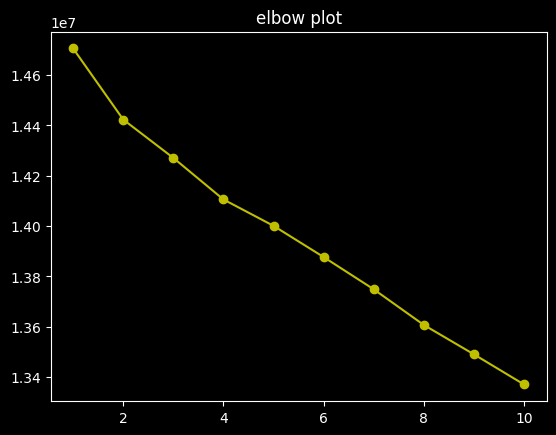

In [ ]:
fig, ax=plt.subplots()
ax.plot(range(1, len(models)+1), [model.inertia_ for model in models], color='y', marker='o')
ax.set_title('elbow plot')
plt.show()

### Model_1

In [ ]:
models=[KMeans(n_clusters=k, n_init=100, random_state=42, max_iter=100).fit(X[1]) for k in range(1, 11)]

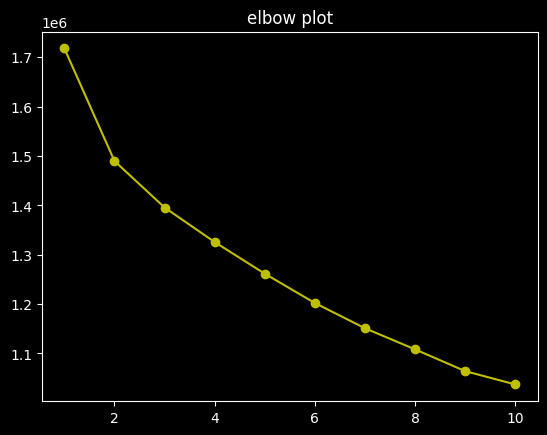

In [ ]:
draw_el(models)

### Model_2

In [ ]:
len(X[2])-len(X[2].dropna())

163

In [ ]:
d_all=X[2].dropna().describe(include='all').T
d_all[d_all['mean']==float('inf')]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
time_signature,113837.0,NaN,NaN,NaN,inf,NaN,inf,NaN,NaN,NaN,inf


In [ ]:
X[2]['time_signature']=df['time_signature']/(df['time_signature'].max()-df['time_signature'].min())

In [ ]:
len(X[2])-len(X[2].dropna())

0

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[2]) for k in range(1, 11)]

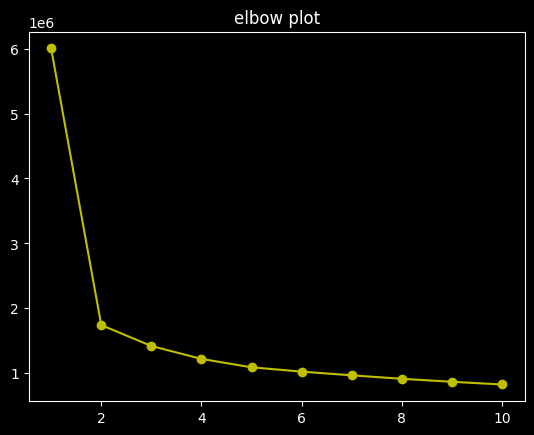

In [ ]:
draw_el(models)

Here is a very good elbow plot in which we can see that there are two clusters. But it's a very small number of clusters, so let k=3.

In [ ]:
df_for_clust['cluster']=models[2].labels_

In [ ]:
df_for_clust.groupby('cluster').size()

,0
cluster,
0,86926
1,19999
2,7075


In [ ]:
df_for_clust.groupby('cluster')[cols_rn].mean()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,34.284529,223479.213296,0.574786,0.657691,5.302648,-7.328203,0.653924,0.063217,0.298836,0.019089,0.214049,0.509161,122.777937,3.917574
1,28.910346,256592.571479,0.503311,0.552152,5.270314,-12.590703,0.589479,0.065425,0.379654,0.802967,0.182669,0.303871,119.310740,3.835792
2,32.621625,203190.745300,0.648142,0.693242,5.498657,-7.449980,0.572297,0.402364,0.329395,0.010140,0.294756,0.524008,122.425865,3.930601


In [ ]:
df_for_clust.groupby('cluster')[cols_rn].median()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,37.0,212766.5,0.582,0.694,5.0,-6.557,1.0,0.0464,0.168,0.000007,0.136,0.503,122.022,4.0
1,25.0,228466.0,0.526,0.595,5.0,-10.448,1.0,0.0481,0.131,0.855000,0.114,0.230,122.842,4.0
2,29.0,192632.0,0.651,0.705,6.0,-6.669,1.0,0.3260,0.241,0.000000,0.176,0.533,119.451,4.0


In [ ]:
df_for_clust.groupby('cluster')[cols_b].mean()

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music,explicit
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.011032,0.007328,0.010699,0.010710,0.002692,0.007063,0.005602,0.009732,0.010883,0.009732,...,0.000759,0.010791,0.010561,0.009169,0.003946,0.005269,0.005694,0.009376,0.010354,0.076076
1,0.001950,0.014651,0.003000,0.001850,0.038252,0.015201,0.025251,0.007650,0.001650,0.000600,...,0.045602,0.000900,0.003950,0.007950,0.032102,0.025551,0.022351,0.002100,0.004900,0.026801
2,0.000283,0.009894,0.001413,0.004523,0.000141,0.011590,0.001131,0.000141,0.002968,0.020071,...,0.003110,0.006219,0.000424,0.006219,0.002120,0.004382,0.008198,0.020212,0.000283,0.367208


In [ ]:
df_for_clust[df_for_clust['cluster']==0][cols_b].mean().sort_values(ascending=False)

,0
explicit,0.076076
mandopop,0.011458
gospel,0.011424
pagode,0.011412
country,0.011401
...,...
detroit-techno,0.002128
idm,0.002059
comedy,0.001622
minimal-techno,0.001242


In [ ]:
df_for_clust[df_for_clust['cluster']==1][cols_b].mean().sort_values(ascending=False)

,0
study,0.045602
minimal-techno,0.044202
sleep,0.040552
new-age,0.040252
detroit-techno,0.040202
...,...
party,0.000050
mandopop,0.000050
comedy,0.000000
sertanejo,0.000000


In [ ]:
df_for_clust[df_for_clust['cluster']==2][cols_b].mean().sort_values(ascending=False)

,0
explicit,0.367208
comedy,0.121413
j-dance,0.066714
dancehall,0.047915
funk,0.034629
...,...
acoustic,0.000283
bluegrass,0.000141
ambient,0.000141
honky-tonk,0.000000


In [ ]:
df['cluster']=models[2].labels_
cluster_0=df[df['cluster']==0]
cluster_1=df[df['cluster']==1]
cluster_2=df[df['cluster']==2]

In [ ]:
cluster_0.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,0
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,0
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,...,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,0
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,...,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,0
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,...,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,0


In [ ]:
cluster_1.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
62,7x4b0UccXSKBWxWmjcrG2T,Kurt Cobain,Montage Of Heck: The Home Recordings,And I Love Her,66,124933,False,0.616,0.282,1,...,1,0.0331,0.983,0.833,0.1300,0.435,96.638,4,acoustic,1
163,5RO0MNa5hBKIM4OcjygadU,Joseph Sullinger,Chi Mai,Chi Mai,40,188695,False,0.739,0.287,6,...,0,0.0590,0.969,0.961,0.1110,0.557,80.640,4,acoustic,1
173,7Ca2CkwSqHyr3eCh8IRdjz,Agustín Amigó;Nylonwings,Mujer con Abanico,Mujer con Abanico,41,156787,False,0.769,0.135,5,...,0,0.0610,0.986,0.905,0.1060,0.471,103.939,4,acoustic,1
183,2f4jlGvGi3ZDGogXys5FUp,Rachael Yamagata,Something In the Rain (Music from the Original...,"La La La (Something In the Rain, Pt. 2) [Music...",44,219613,False,0.420,0.200,7,...,1,0.0492,0.929,0.490,0.0758,0.164,87.248,4,acoustic,1
294,1pV4cJaYl9ovK0GcSjH1hy,Eddy Tyler,Guitar Instrumental Covers,A Thousand Years,43,279916,False,0.586,0.396,10,...,1,0.0319,0.896,0.543,0.0992,0.160,142.591,3,acoustic,1
315,0xlyMQ56pZAoGuLCs7GH90,Andrew Foy,Love Nwantiti,Love Nwantiti,30,129032,False,0.480,0.158,8,...,1,0.0807,0.809,0.886,0.1170,0.498,86.107,4,acoustic,1
324,7HSk4yGZxfjOkHyOvZrBQZ,John Frusciante,To Record Only Water For Ten Days (U.S. Version),Ramparts,53,70133,False,0.386,0.428,10,...,0,0.0295,0.951,0.882,0.1620,0.730,172.311,4,acoustic,1
333,0avtLG17MT8kDf9xc67Niv,Rodrigo y Gabriela,Rodrigo Y Gabriela,Tamacun,50,205800,False,0.588,0.914,7,...,1,0.0341,0.832,0.856,0.1030,0.971,128.553,4,acoustic,1
417,2JI53ZVCxMucM68UpCtZ5C,Wayne Mack,Fake a smile,Fake a smile,57,169600,False,0.731,0.191,0,...,1,0.1220,0.735,0.671,0.1310,0.274,149.910,4,acoustic,1
419,0Bv0qHGKNiwzDtHzXrjmIn,Sungha Jung,Irony,River Flows In You,42,214466,False,0.356,0.230,6,...,0,0.0519,0.923,0.801,0.1120,0.110,129.532,4,acoustic,1


In [ ]:
cluster_2.head()

I've listened 5 songs of each cluster and I can say next:
* Cluster 0 and 2 are really alike, and I didn`t notice any difference. It must be one cluster and k must equal 2.
* The difference between two clusters is next: 0 and 2 are typical songs we've been used to. Cluster 1 are guitar covers or even original songs, but with minimum lyrics and with a prominent role of the guitar.

Because k=2 is a small number of clusters I'll continue search of new models for better model

### Model_3

In [ ]:
models=[KMeans(n_clusters=k, n_init=100, max_iter=100, random_state=42).fit(X[3]) for k in range(1, 11)]

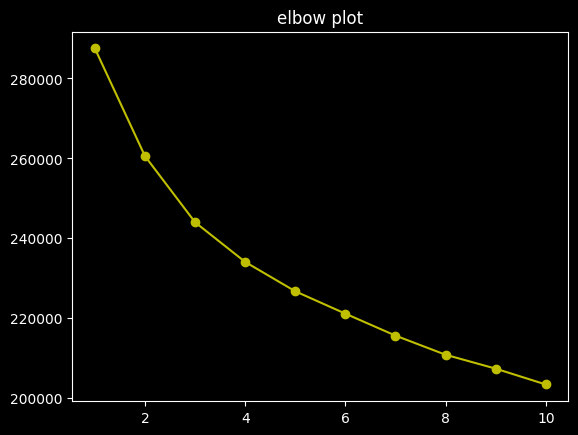

In [ ]:
draw_el(models)

### Model_4

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[4]) for k in range(1, 11)]

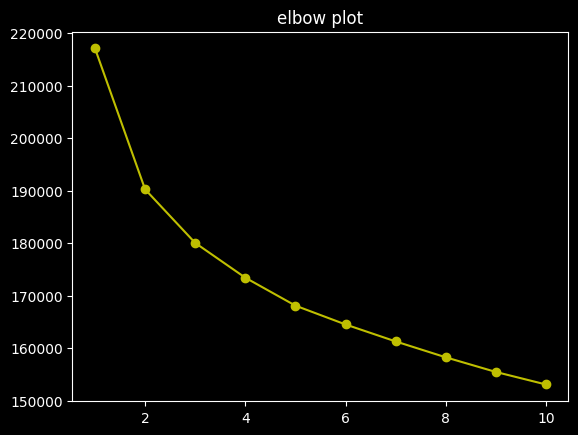

In [ ]:
draw_el(models)

### Model_5

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[5]) for k in range(1, 31)]

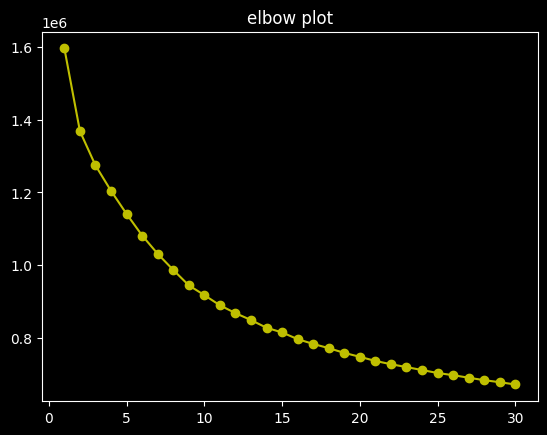

In [ ]:
draw_el(models)

### Model_6

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[6]) for k in range(1, 11)]

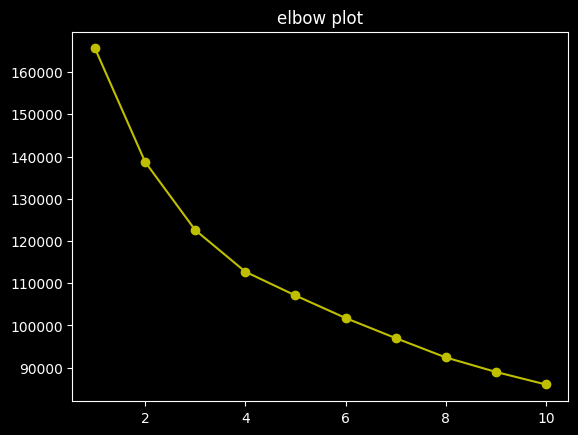

In [ ]:
draw_el(models)

### Model_7

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[7]) for k in range(1, 11)]

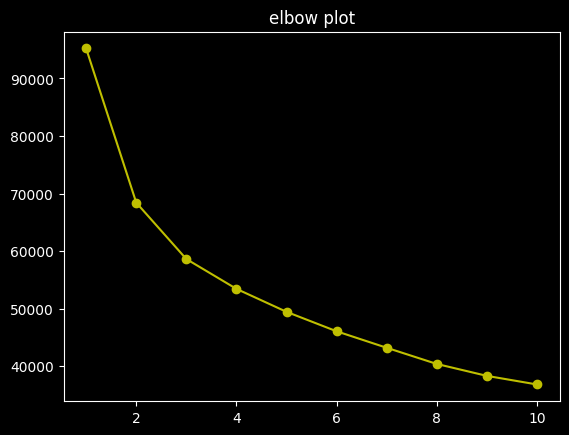

In [ ]:
draw_el(models)

### Model_8

In [ ]:
cols=cols_rn.append(cols_b)
len(cols)

129

We've tried different ways to normilize our columns but it didn't give us result we wanted. So let's try to modify our predictors. First, let's try PCA.

In [ ]:
pca=PCA()
pca.fit(StandardScaler().fit_transform(df_for_clust[cols]))

PCA()

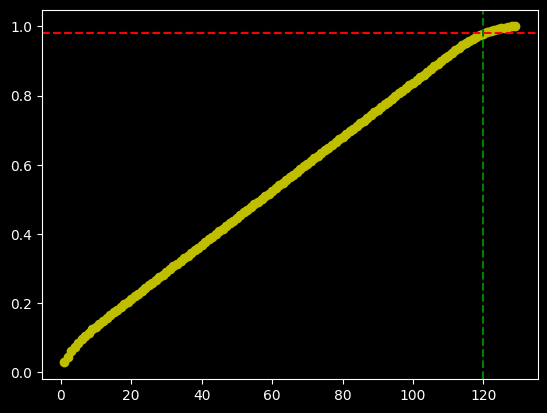

In [ ]:
fig, ax=plt.subplots()
ax.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
ax.axhline(y=0.98, color='r', linestyle='--')
ax.axvline(x=120, color='g', linestyle='--')
plt.show()

In [ ]:
X.append(PCA(n_components=120).fit_transform(StandardScaler().fit_transform(df_for_clust[cols])))

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[8]) for k in range(1, 31)]

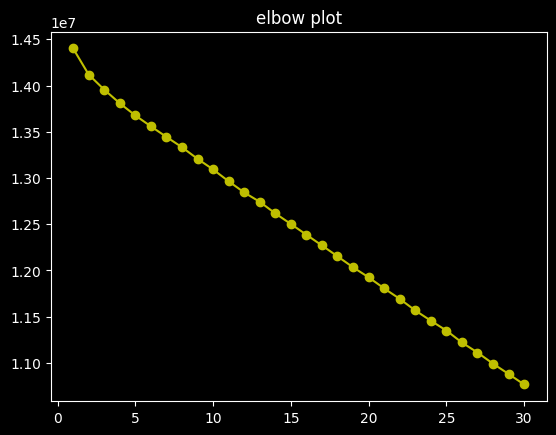

In [ ]:
draw_el(models)

### Model_9

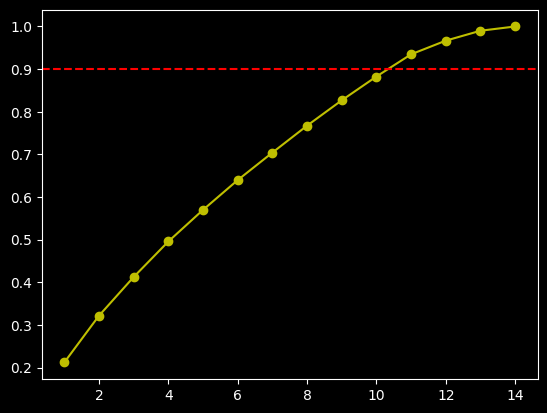

In [ ]:
pca=PCA()
pca.fit(StandardScaler().fit_transform(df_for_clust[cols_rn]))
fig, ax=plt.subplots()
ax.plot(range(1, len(cols_rn)+1), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
ax.axhline(y=0.9, color='r', linestyle='--')
plt.show()

In [ ]:
X.append(PCA(n_components=10).fit_transform(StandardScaler().fit_transform(df_for_clust[cols_rn])))

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X[9]) for k in range(1, 31)]

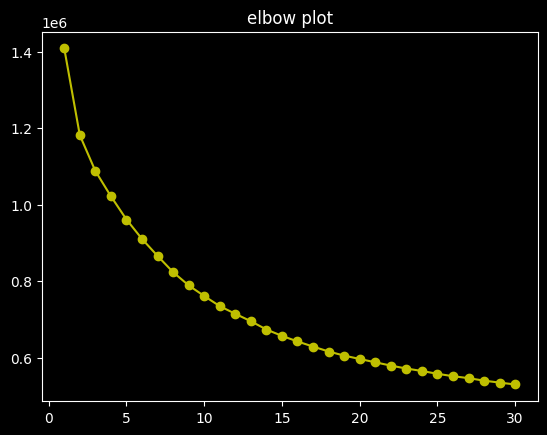

In [ ]:
draw_el(models)

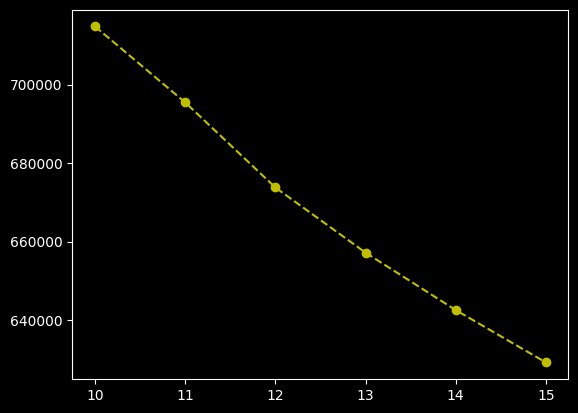

In [ ]:
fig, ax=plt.subplots()
ax.plot(range(10, 16), [m.inertia_ for m in models[11:17]], color='y', linestyle='--', marker='o')

plt.show()

### Model_10

So, PCA didn't give us elbows we would like, so let's try heavy artillery: t-SNE.

In [ ]:
tsne=TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
X_tsne_2=tsne.fit(StandardScaler().fit_transform(df_for_clust[cols]))

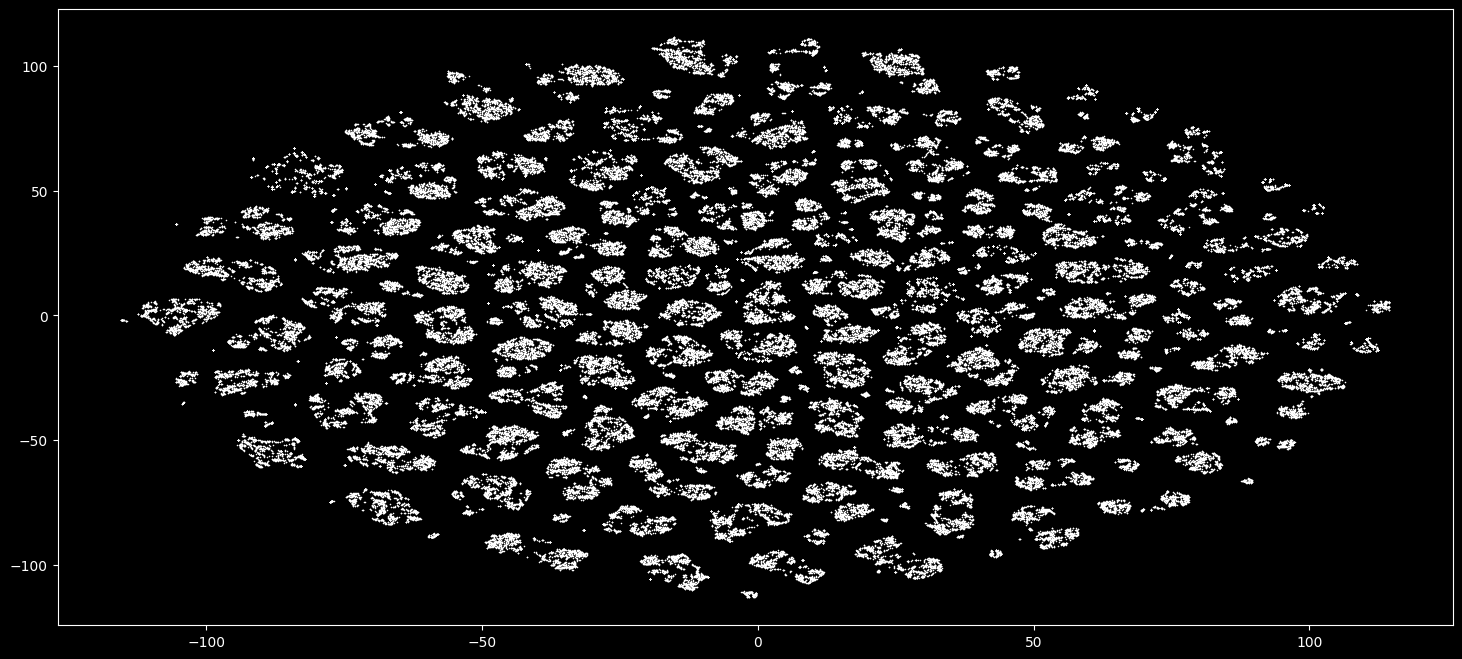

In [ ]:
fig, ax=plt.subplots(figsize=(18,8))
sns.scatterplot(x=X_tsne_2[:,0], y=X_tsne_2[:,1], color='w', s=1, ax=ax)

plt.show()

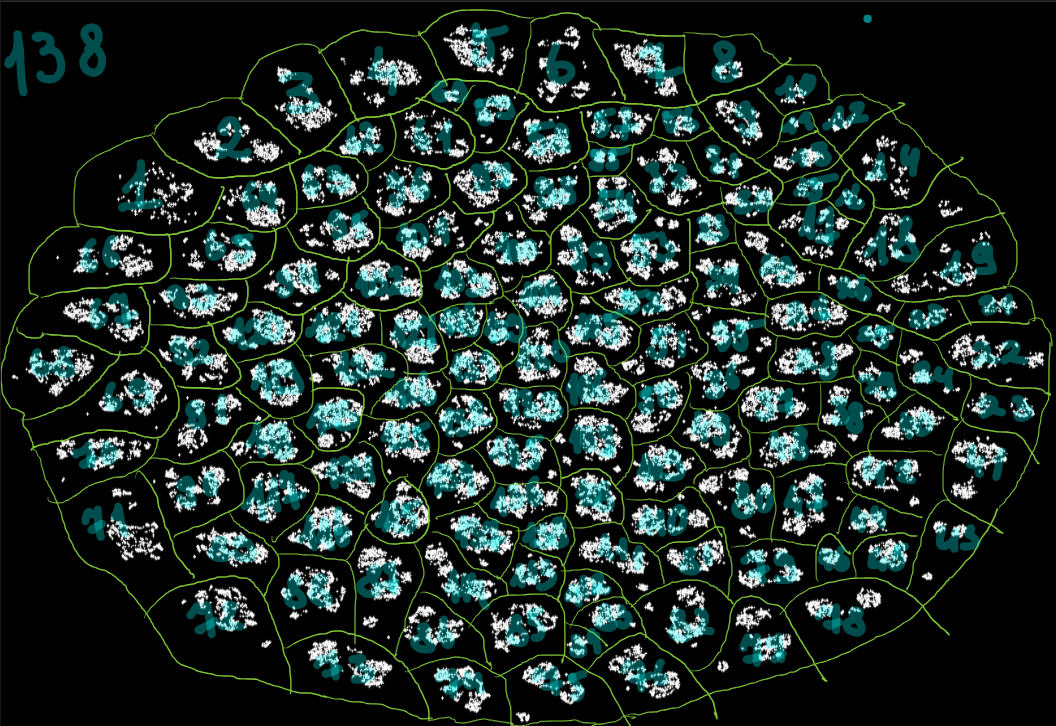

Using my intuition and skills to draw I made this picture. Also I counted number of clusters and it was 138. Of course I could do some mistakes, so we'll build models with number of clusters from 135 to 150 and we'll look at elbow plot.

In [ ]:
models=[KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=100).fit(X_tsne_2) for k in range(135, 151)]

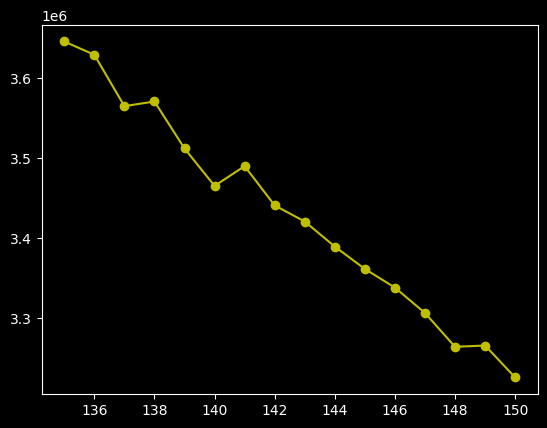

In [ ]:
fig, ax= plt.subplots()
ax.plot(range(135, 151), [m.inertia_ for m in models], color='y', marker='o')
plt.show()

In [ ]:
k_try=[137, 140, 148]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


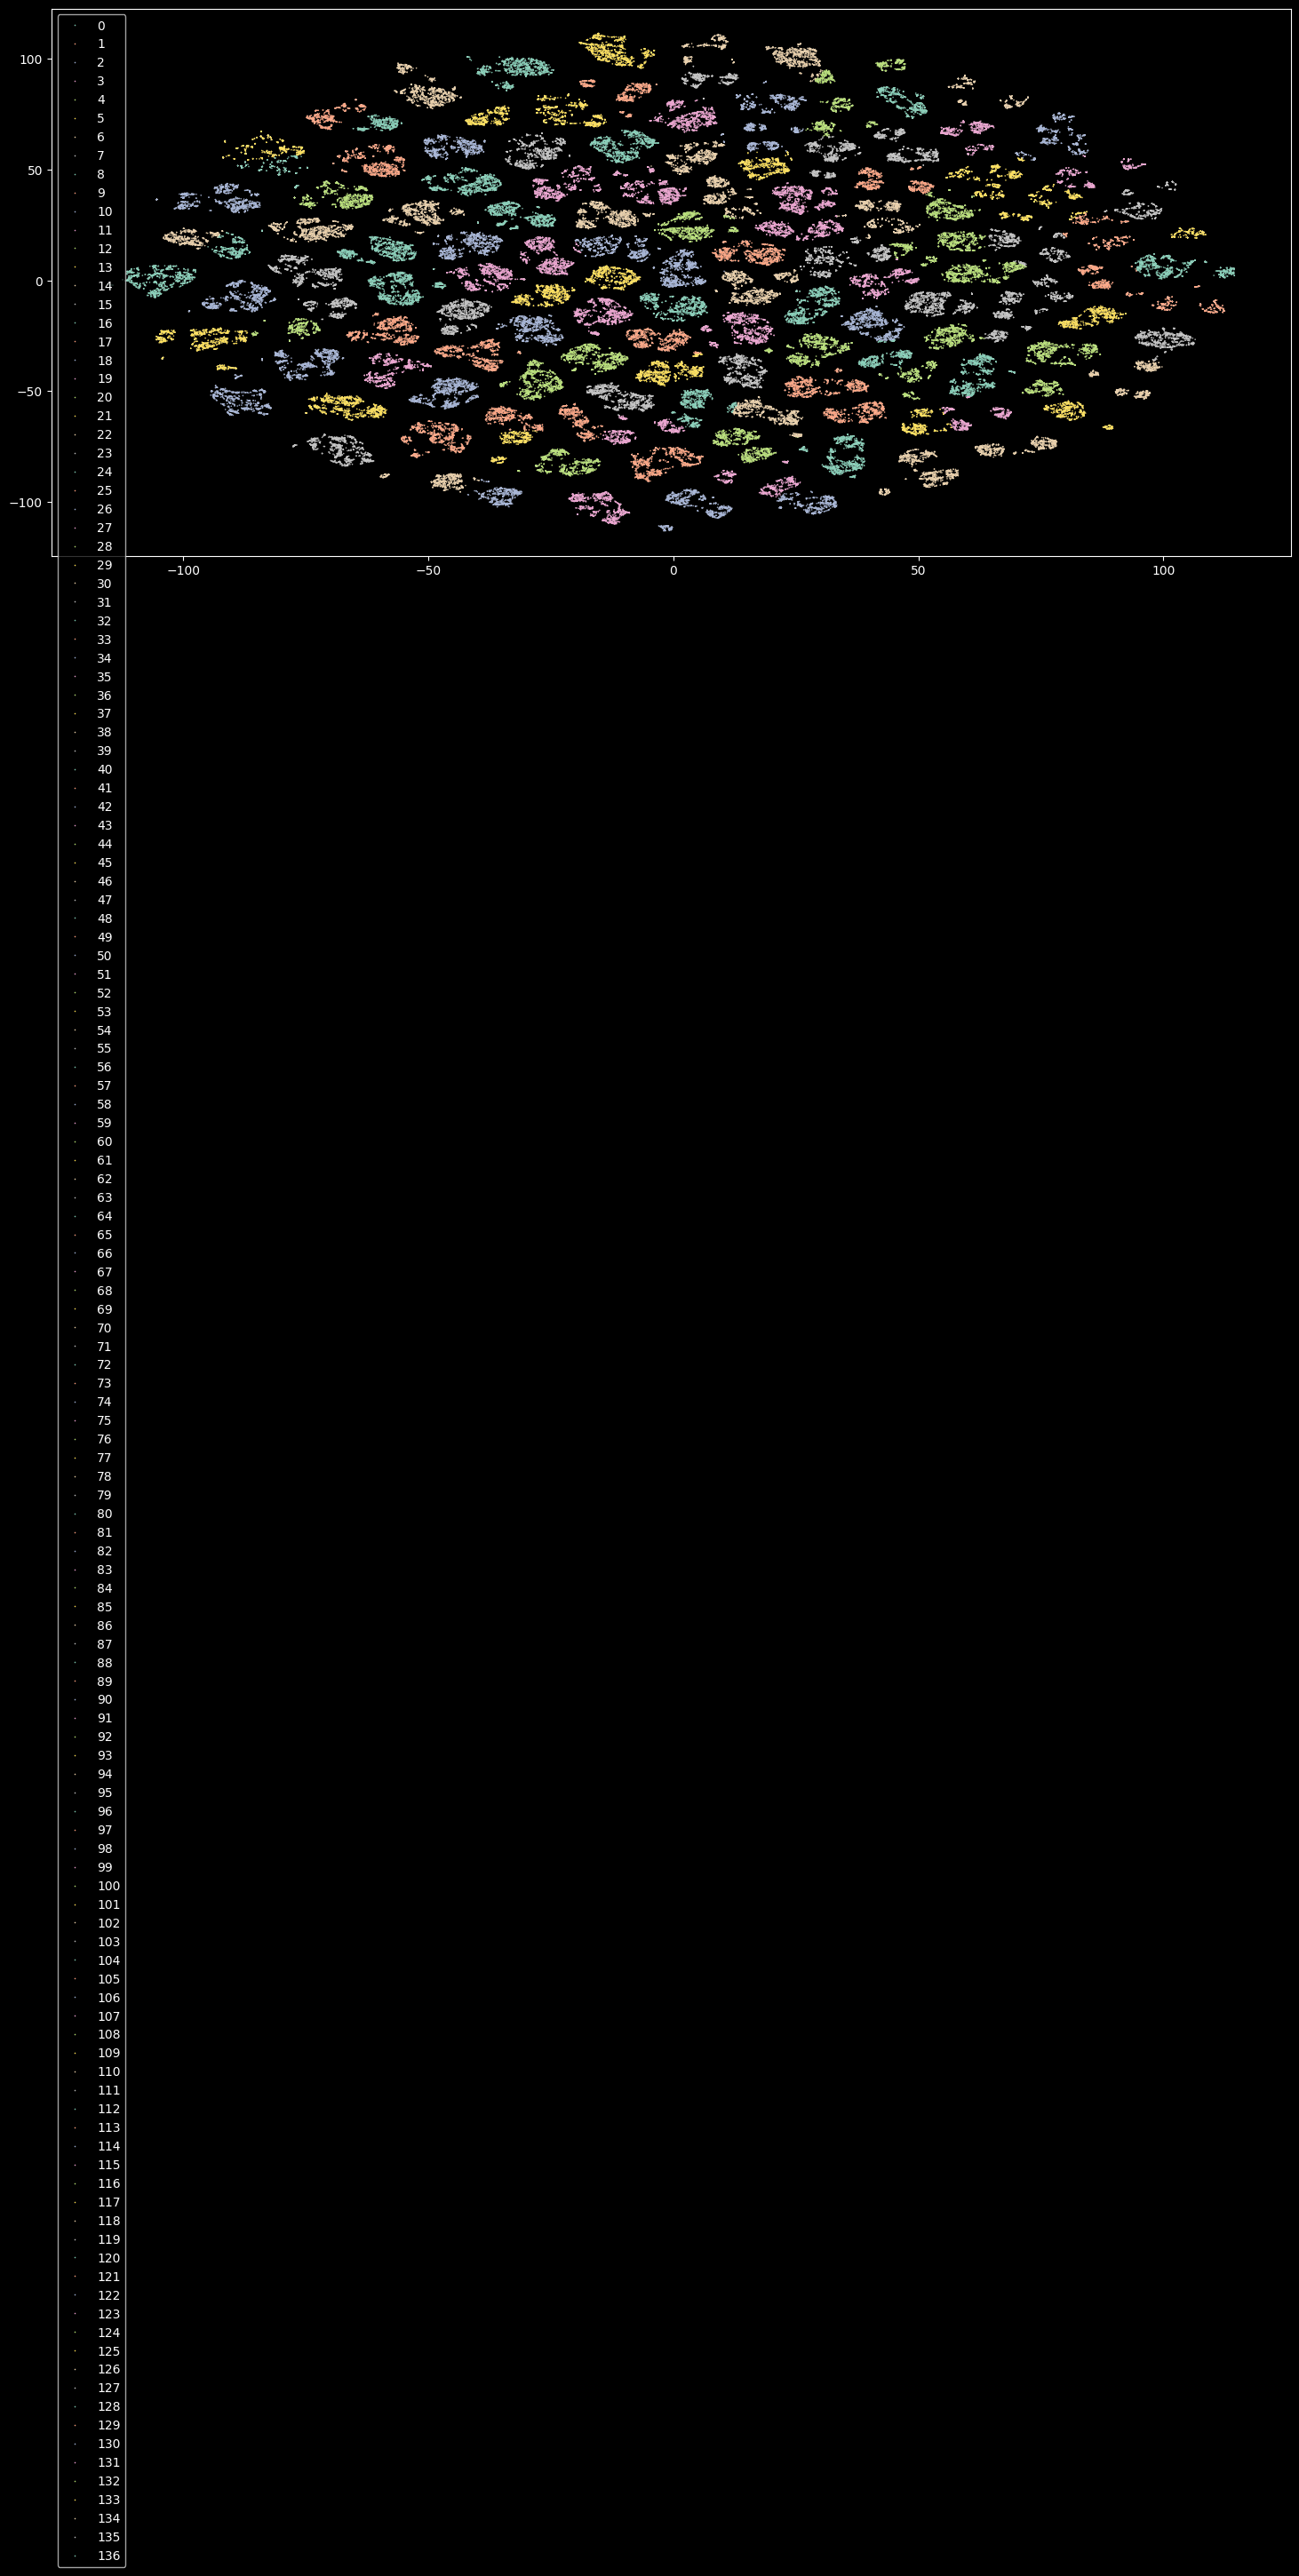

In [ ]:
fig, ax=plt.subplots(figsize=(18,8))
sns.scatterplot(x=X_tsne_2[:,0], y=X_tsne_2[:,1], hue=models[2].labels_, palette='Set2',s=1, ax=ax)
plt.show()

Scatter plot for k=137 looks ok for me. But also k=140 and k=148 are worth attention.

In [ ]:
df_for_clust['cluster']=models[2].labels_
df_for_clust.groupby('cluster').size().sort_values(ascending=False)

,0
cluster,
38,1248
127,1166
8,1157
107,1143
69,1091
...,...
24,462
0,432
96,424


In [ ]:
X.append(X_tse_2)

### Conclusion

We've tried 11 different models of k-means clustering for that dataset. There were only two results we could be proud of: Model_2 and Model_10. If k=2 is not a small number of clusters for us and we need some interpretation, so Model_2 is the best. If we need some big number of clusters, but interpretation is not so important(I just can't listen 3 random songs of each cluster, it is too much work to be done) and we blindly believe in math behind the model, so Model_10 is the best.